In [2]:
import pandas as pd
import numpy as np
import os, json
import matplotlib as mpl
import matplotlib.pyplot as plt

In [67]:
def load_log(
    data_dir = '.',
    sim_idx = 0,
    func = 'exponential',
    n_train = 200,
    n_valid = 50,
    p = 1,
    integer = False,
    lb = -10,
    ub = 10,
    noise = 0.1,
):
    with open('%s/data_%d/%s_n_%s_p_%d_int_%d_(%.1f,%.1f)_noise_%.2f_log.jsonl' % (data_dir,sim_idx+1, func, n_train+n_valid, p, integer, lb, ub, noise)) as f:
        data_json = json.load(f)
    return data_json

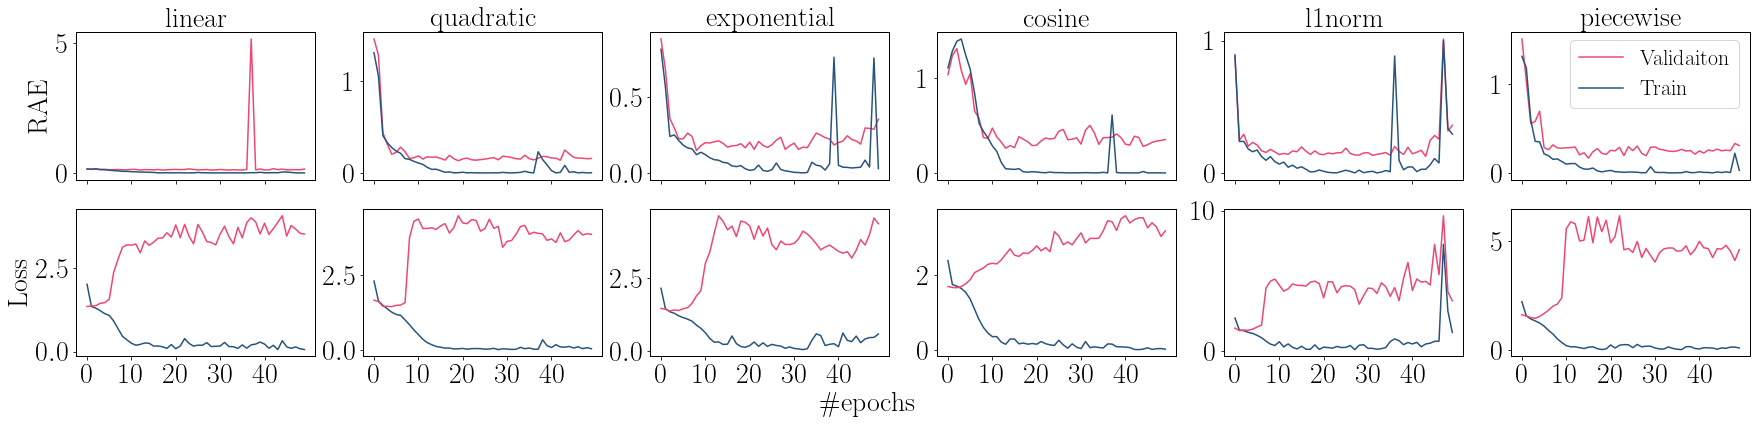

In [105]:
width = 25
height = 6
epochs = 50

train_c = '#26547c'
val_c = '#ef476f'

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=23)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=1 #width of the boundary of legend

fig, ax = plt.subplots(nrows=2, ncols=6, sharex = True, sharey=False) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.06, bottom=.15, right=0.99, top=0.9, wspace=0.2) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

# ax.plot(exp_json['rmse_woo_train'], label = 'Train')
for i, func in enumerate(["linear", "quadratic", "exponential","cosine","l1norm","piecewise"]):
    data_json = load_log(func = func)
    ax[0][i].plot(data_json['rae_woo_val'][:epochs], label = 'Validaiton', c = val_c)
    ax[0][i].plot(data_json['rae_woo_train'][:epochs], label = 'Train', c = train_c)
    ax[0][i].set_title(func, fontsize = 28)
    ax[0][i].set_xticks(np.arange(0,50,10))
    
    ax[1][i].plot(data_json['train_loss'][:epochs], label = 'Train', c = train_c)
    ax[1][i].plot(data_json['val_loss'][:epochs], label = 'Validation', c = val_c)

ax[0][5].legend(fontsize = 22, bbox_to_anchor = (0.2, 1.02))
fig.supxlabel('\#epochs', fontsize = 28)
ax[0][0].set_ylabel('RAE', fontsize = 28)
ax[1][0].set_ylabel('Loss', fontsize = 28)
plt.savefig('../figures/log.pdf')


In [46]:
with open('data_1/log_try_lr_1e-5.jsonl') as f:
    small_lr_data_json = json.load(f)
with open('data_1/log_try.jsonl') as f:
    data_json = json.load(f)

In [25]:
df_train = {}
train_list = ['train_y']
for epoch in np.arange(50,step = 5):
    train_list.append('train_output_%d' % epoch)
for item in train_list:
    df_train[item] = data_json[item]
df_train = pd.DataFrame(df_train)

In [33]:
len(set(df_train['train_output_45']).intersection(set(df_val['val_output_45']))) / len(set(df_val['val_output_45']))

0.5333333333333333

In [22]:
df_val = {}
val_list = ['val_y']
for epoch in np.arange(50,step = 5):
    val_list.append('val_output_%d' % epoch)
for item in val_list:
    df_val[item] = data_json[item]
df_val = pd.DataFrame(df_val)

In [29]:
df_val

,val_y,val_output_0,val_output_5,val_output_10,val_output_15,val_output_20,val_output_25,val_output_30,val_output_35,val_output_40,val_output_45
0,-5.875677,-0.845,7.249,-8.349,-1.191,-7.000,-6.007,-6.322000,-6.354,0.411844,-6.289000
1,-7.796026,9.931,-0.541,-5.649,-8.138,-8.287,-8.217,-8.344000,-8.179,-8.647000,-8.344000
2,-2.853566,5.923,-8.533,-5.557,-4.192,-4.420,-2.752,-8.287000,-8.271,-8.151000,-4.420000
3,-7.049817,-1.044,-3.863,-4.221,-4.635,-4.593,-7.959,-3.033000,-4.622,-3.139000,-7.635000
4,-6.694118,3.963,-2.847,-1.892,-2.752,-5.271,-7.143,-2.752000,-4.627,-4.620000,-4.752000
5,-6.571604,-2.094,-3.721,-5.441,-3.139,-4.038,-7.137,-5.441000,-4.136,-7.878000,-7.695000
6,8.646050,3.093,7.931,8.330,8.086,8.972,9.255,0.411844,8.370,8.331000,8.338000
7,2.549255,9.212,8.647,5.403,5.382,2.441,2.403,7.110000,7.210,5.429000,5.429000
8,8.679155,-2.220,8.349,7.096,7.985,8.289,9.204,8.203000,8.745,8.817000,8.931000
9,6.120977,8.064,-0.918,7.912,7.931,1.631,7.646,7.217000,6.378,6.815000,7.745000


In [26]:
df_train

,train_y,train_output_0,train_output_5,train_output_10,train_output_15,train_output_20,train_output_25,train_output_30,train_output_35,train_output_40,train_output_45
0,8.104774,3.946,4.367,5.3420,8.105,8.105000,8.105,8.105,8.105,8.105,8.105
1,4.321537,-2.856,-5.547,4.3220,4.322,4.322000,4.322,4.322,4.322,4.322,4.322
2,8.352766,-8.622,5.429,8.3530,8.353,8.353000,8.353,8.353,8.353,8.353,8.353
3,-8.360063,7.081,-9.517,-7.8524,-8.360,-8.360000,-8.360,-8.360,-8.360,-8.360,-8.360
4,4.257206,4.902,9.157,4.2570,4.257,4.257000,4.257,4.257,4.257,4.257,4.257
...,...,...,...,...,...,...,...,...,...,...,...
195,-5.911625,-3.939,-6.131,-8.1380,-5.912,0.411844,-5.912,-5.912,-5.912,-5.812,-5.912
196,6.358849,-3.828,3.892,5.2790,6.359,6.359000,6.359,6.359,6.359,6.359,6.359
197,-8.749906,-2.249,-8.750,-8.7500,-8.750,-8.750000,-8.750,-8.750,-8.750,-8.750,-8.750
198,8.316223,5.769,3.264,7.0920,8.316,8.316000,8.316,8.316,8.316,8.316,8.316


Text(0, 0.5, 'RAE')

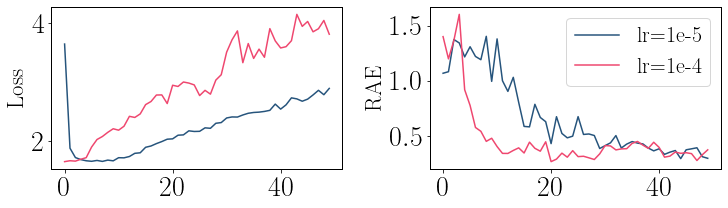

In [62]:
width = 10
height = 3

small_c = '#26547c'
standard_c = '#ef476f'

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=23)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=1 #width of the boundary of legend

fig, ax = plt.subplots(nrows=1, ncols=2, sharex = True, sharey=False) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.06, bottom=.15, right=0.99, top=0.9, wspace=0.3) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

ax[0].plot(small_lr_data_json['val_loss'], label = 'lr=1e-5', c = small_c)
ax[0].plot(data_json['val_loss'], label = 'lr=1e-4', c = standard_c)
ax[0].set_ylabel('Loss')

ax[1].plot(small_lr_data_json['rae_woo_val'], label = 'lr=1e-5', c = small_c)
ax[1].plot(data_json['rae_woo_val'], label = 'lr=1e-4', c = standard_c)
ax[1].legend(fontsize = 22)
ax[1].set_ylabel('RAE')

In [43]:
data_json.keys()

dict_keys(['train_y', 'val_y', 'rmse_train', 'rmse_woo_train', 'rae_train', 'rae_woo_train', 'rmse_val', 'rmse_woo_val', 'rae_val', 'rae_woo_val', 'rmse_test', 'rmse_woo_test', 'rae_test', 'rae_woo_test', 'train_loss', 'val_loss', 'train_output_0', 'val_output_0', 'train_output_5', 'val_output_5', 'train_output_10', 'val_output_10', 'train_output_15', 'val_output_15', 'train_output_20', 'val_output_20', 'train_output_25', 'val_output_25', 'train_output_30', 'val_output_30', 'train_output_35', 'val_output_35', 'train_output_40', 'val_output_40', 'train_output_45', 'val_output_45'])